In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt


def argmax (x):
    res = -1.0
    for i in x:
        if abs(i) > res:
            res = abs(i)
    return res

## Добавим исходную функцию и её производную

$f(x) = 3x^3 - x^2 + x$

$f'(x) = 9x^2 - 2x + 1$

$f''(x) = 18x - 2$


In [11]:
def f(x):
    return math.sin(x) 
    #return 3*x**3 - x**2 + x

def df(x):
    return math.cos(x)
    #return 9*x**2 - 2*x + 1

def ddf(x):
    return -math.sin(x)
    #return 18*x - 2

## Сделаем проектор

In [12]:
def projector (f, h, x_min, x_max):
    x = x_min
    res = np.zeros((0,1))
    while x < x_max:
        res = np.append(res, f(x))
        x += h
    return res

### $f'$ c точностью $o(h)$
Построим $f'$ первого порядка, для этого воспользуемся формулой $f'_n = \frac{f_{n+1} - f_{n}}{h}$, в правом конце используем $f'_n = \frac{f_{n} - f_{n-1}}{h}$

In [13]:
def diff_O1 (f, h):
    len_1 = f.shape[0]
    res = np.zeros((0,1))
    for i in range(len_1 - 1):
        res = np.append(res, (f[i + 1] - f[i])/(h))
    res = np.append(res, (f[-1] - f[-2])/(h))
    
    return res
        

### $f'$ c точностью $o(h^2)$
Построим $f'$ второго порядка, для этого воспользуемся формулой $f'_n = \frac{f_{n+1} - f_{n-1}}{2h}$, в правом конце используем $f'_n = \frac{3/2f_n - 2f_{n-1} + 1/2f_{n-2}}{h}$, в левом конце используем $f'_0 = \frac{-3/2f_0 + 2f_1 + -1/2f_2}{h} $

In [14]:
def diff_O2 (f, h):
    len_1 = f.shape[0]
    res = np.zeros((0,1))
    res = np.append(res, ((-3/2)*f[0] + 2*f[1] + (-1/2)*f[2])/(h))
    for i in range(1, len_1 - 1):
        res = np.append(res, (f[i + 1] - f[i-1])/(2*h))
    res = np.append(res, ((3/2)*f[-1] - 2*f[-2] + (1/2)*f[-3])/(h))
    
    return res

### $f''$ c точностью $o(h^2)$
Построим $f''$ второго порядка, для этого воспользуемся формулой $f''_n = \frac{f_{n-1} - 2f_{n} + f{n+1}}{h^2}$, в правом конце используем $f''_n = \frac{2f_n - 5f_{n-1} + 4f_{n-2} - f_{n-3}}{h^2}$, в левом конце используем $f''_0 = \frac{2f_0 - 5f_{1} + 4f_{2} - f_{3}}{h^2}$.

In [15]:
def diff2_O2 (f, h):
    len_1 = f.shape[0]
    res = np.zeros((0,1))
    res = np.append(res, (2*f[0] - 5*f[1] + 4*f[2] - f[3])/(h**2))
    for i in range(1, len_1 - 1):
        #res = np.append(res, (f[i + 2] - 4*f[i + 1] + 6*f[i] - 4*f[i - 1] + f[i + 2])/(h**2))
        res = np.append(res, (f[i + 1] - 2*f[i] + f[i - 1])/(h**2))
    
    #res = np.append(res, res[-1])
    #res[0] = res[1]
    
    #что-то нетак, но что не ясно
    res = np.append(res, (2*f[-1] - 5*f[-2] + 4*f[-3] - f[-4])/(h**2))
    #print(res[-1] - res[-2])
    return res

## Снимем данные

In [16]:

res_1_1 = np.zeros((0,1))
res_1_2 = np.zeros((0,1))
res_1_22 = np.zeros((0,1))

h_arr = np.zeros((0,1))

h = 0.0001

while h < 0.1:
    f_1       = projector(f,   h, 0, 1)
    diff_f_1  = projector(df,  h, 0, 1)
    diff2_f_1 = projector(ddf, h, 0, 1)
    
    my_diff_O1_f_1  = diff_O1 (f_1, h)
    my_diff_O2_f_1  = diff_O2 (f_1, h)
    my_diff2_O2_f_1 = diff2_O2(f_1, h)
    
    #my_diff2_O2_f_1[0] = my_diff2_O2_f_1[1]
    #my_diff2_O2_f_1[-1] = my_diff2_O2_f_1[-2]
    
    #my_diff2_O2_f_1[0] = diff2_f_1[0]
    #my_diff2_O2_f_1[-1] = diff2_f_1[-1]
    
    #diff2_f_1[-1] = diff2_f_1[-2]
    #diff2_f_1[0]  = diff2_f_1[1]
    

    res_1_1  = np.append(res_1_1,  argmax(diff_f_1  - my_diff_O1_f_1))
    res_1_2  = np.append(res_1_2,  argmax(diff_f_1  - my_diff_O2_f_1))
    res_1_22 = np.append(res_1_22, argmax(diff2_f_1 - my_diff2_O2_f_1))
    
    h_arr = np.append(h_arr, h)

    h += 0.0001


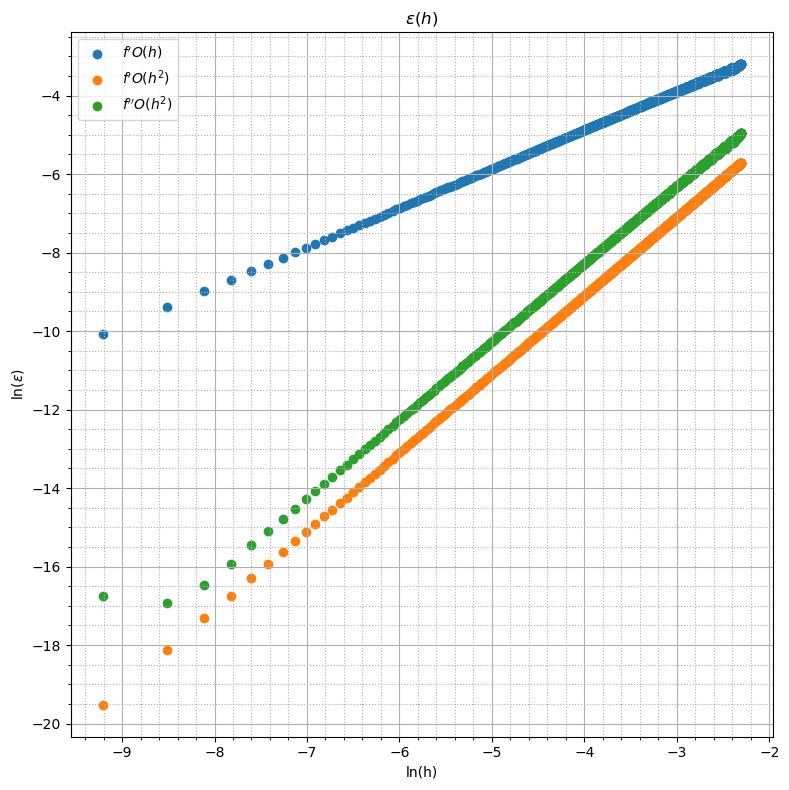

In [17]:
plt.figure(figsize=(8, 8))
plt.title("$\epsilon (h)$")

O1 = plt.scatter(np.log(h_arr), np.log(res_1_1) , marker='o', label = "$f'O(h)$")
O2 = plt.scatter(np.log(h_arr), np.log(res_1_2) , marker='o', label = "$f'O(h^2)$")
O22 = plt.scatter(np.log(h_arr), np.log(res_1_22) , marker='o', label = "$f''O(h^2)$")

plt.legend(handles = [O1, O2, O22])

#plt.scatter(h_arr, res_1_22, marker='o')

plt.xlabel("ln(h)")
plt.ylabel("ln($\epsilon$)")
plt.minorticks_on()
plt.grid(which='major')
plt.grid(which='minor', linestyle=':')
# plt.legend(fontsize = 12)
plt.tight_layout()
plt.show()